Configuracion de entorno

In [1]:
import sys
import os

# Agregar src/ al path
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

Carga de datos

In [3]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "..", "data", "processed", "salaries_clean.csv"))
df = pd.read_csv(data_path)

print(f"Shape del dataset limpio: {df.shape}")
df.head()

Shape del dataset limpio: (600, 61)


,Unnamed: 0,work_year,salary,salary_currency,salary_usd,employee_residence,remote_ratio,company_location,experience_level_encoded,company_size_encoded,...,job_title_Machine Learning Manager,job_title_Machine Learning Scientist,job_title_Marketing Data Analyst,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist
0,0,2020,70000,EUR,79833,DE,0,DE,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2020,260000,USD,260000,JP,0,JP,2.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,2,2020,85000,GBP,109024,GB,50,GB,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2020,20000,USD,20000,HN,0,HN,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,4,2020,150000,USD,150000,US,50,US,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0


Separacion de variables

In [4]:
target = "salary_usd"
X = df.select_dtypes(include=["number"]).drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (480, 57), Test shape: (120, 57)


Entrenamiento de modelo

In [5]:
mlflow.set_experiment("salary_prediction_linear")

with mlflow.start_run():
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)

    # Guardar modelo y columnas
    model_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "models"))
    os.makedirs(model_dir, exist_ok=True)

    model_path = os.path.join(model_dir, "linear_regression_salary.joblib")
    joblib.dump(model, model_path)
    mlflow.log_artifact(model_path, artifact_path="model")

    columns_path = os.path.join(model_dir, "model_columns.joblib")
    joblib.dump(X.columns.tolist(), columns_path)
    mlflow.log_artifact(columns_path, artifact_path="model")

    print(f"Modelo registrado en MLflow")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")


Modelo registrado en MLflow
RMSE: 46907.04
R² Score: 0.3096


Comparativo con datos reales

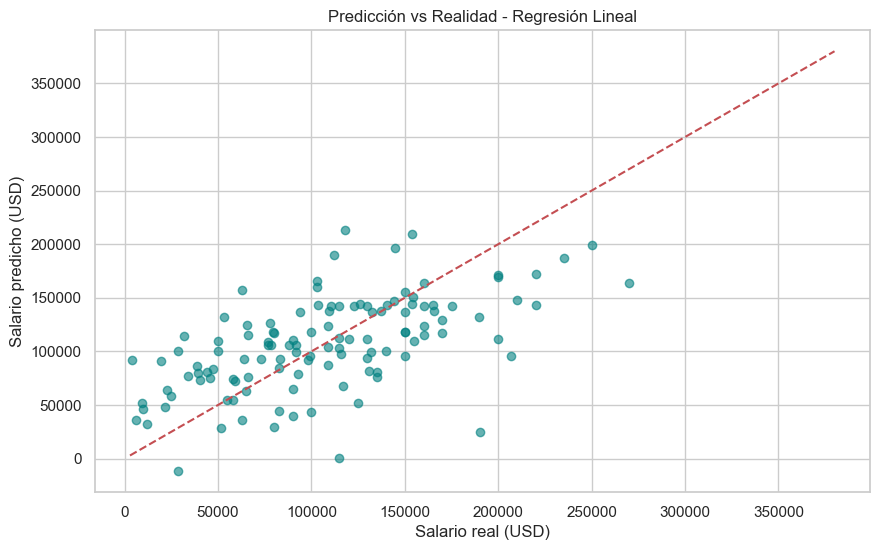

In [6]:
plt.scatter(y_test, y_pred, alpha=0.6, color="teal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Salario real (USD)")
plt.ylabel("Salario predicho (USD)")
plt.title("Predicción vs Realidad - Regresión Lineal")
plt.show()

In [7]:
# Ruta donde guardar el modelo
model_path = os.path.abspath(os.path.join(os.getcwd(), "..", "models", "linear_regression_salary.joblib"))

# Crear carpeta si no existe
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Guardar el modelo
joblib.dump(model, model_path)

print(f"Modelo guardado en: {model_path}")

Modelo guardado en: c:\Users\sarmi\Repositorio_git\Salary\data-scientist-salary-pipeline\models\linear_regression_salary.joblib
